# Noise Generation

## import libraries


In [ ]:
import numpy as np
import librosa
import soundfile as sf
import os
import os
import pandas as pd
import torchaudio
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
def scan_directory_voxceleb1(test_dir):
    data = []
    for person_id in os.listdir(test_dir):
        person_path = os.path.join(test_dir, person_id)
        if os.path.isdir(person_path):
            for utterance_env in os.listdir(person_path):
                utterance_path = os.path.join(person_path, utterance_env)
                if os.path.isdir(utterance_path):
                    for file in os.listdir(utterance_path):
                        file_path = os.path.join(utterance_path, file)
                        if os.path.isfile(file_path):
                            # Assuming embedding is a placeholder for actual embedding extraction
                            embedding = "embedding_placeholder"
                            data.append([file_path, person_id, utterance_env, file, embedding])
    
    df = pd.DataFrame(data, columns=['path', 'person_id', 'utterance_env', 'utterance_filename', 'embedding'])
    return df

# Example usage
test_dir = '../data/vox1_test_wav'
df = scan_directory_voxceleb1(test_dir)

In [96]:


# Load an example audio file
waveform, sample_rate = torchaudio.load(df['path'][0])

# Play the audio
Audio(waveform.numpy(), rate=sample_rate)

In [ ]:


from numpy import ndarray


def add_noise(signal: ndarray, snr_db=20, noise_type="gaussian") -> ndarray:
    """
    Dodaje szum do sygnału.

    :param signal: Sygnał wejściowy.
    :param noise_type: Typ szumu ('gaussian', 'uniform', 'poisson', 'impulse').
    :param snr_db: Pożądane SNR w decybelach.
    :return: Sygnał z dodanym szumem.
    """
    signal_average_power = np.mean(signal**2)
    signal_average_power_db = 10 * np.log10(signal_average_power)
    noise_db = signal_average_power_db - snr_db
    noise_power = 10 ** (noise_db / 10)
    rms_noise = np.sqrt(noise_power)
    mean_noise = 0

    if noise_type == "gaussian":
        noise = np.random.normal(mean_noise, rms_noise, signal.shape)
    elif noise_type == "uniform":
        noise = np.random.uniform(-rms_noise, rms_noise, signal.shape)
    elif noise_type == "poisson":
        noise = np.random.poisson(rms_noise, signal.shape) - rms_noise
    else:
        raise ValueError("Nieobsługiwany typ szumu.")

    return signal + noise

In [106]:
def plot_waveform(waveform):

    plt.figure(figsize=(10, 4))
    plt.plot(waveform[0])
    plt.title("Noisy Audio Signal")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

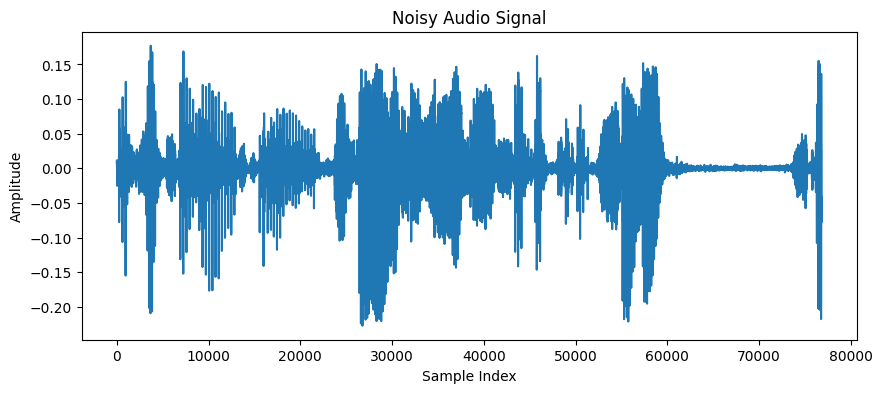

In [107]:
plot_waveform(waveform)
display(Audio(waveform.numpy(), rate=sample_rate))

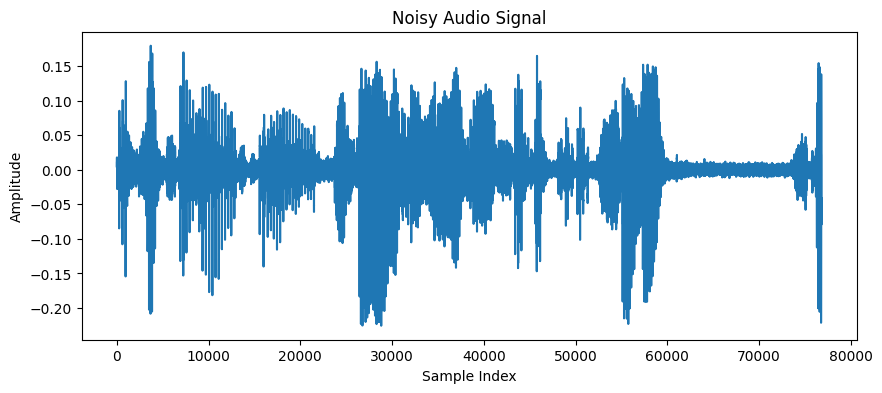

In [108]:
# add noise to the signal
noisy_waveform = add_noise(waveform.numpy(), noise_type="gaussian", snr_db=20)

# Play the noisy audio
display(Audio(noisy_waveform, rate=sample_rate))

plot_waveform(noisy_waveform)

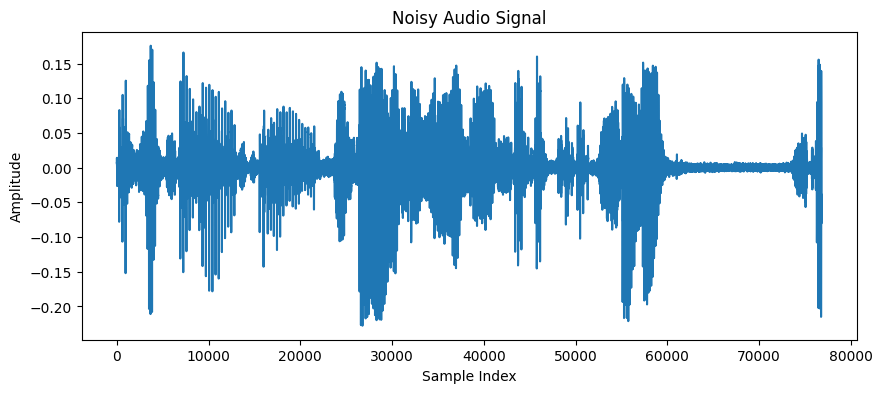

In [109]:

# unifrom noise
noisy_waveform = add_noise(waveform.numpy(), noise_type="uniform", snr_db=20)

# Play the noisy audio
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)


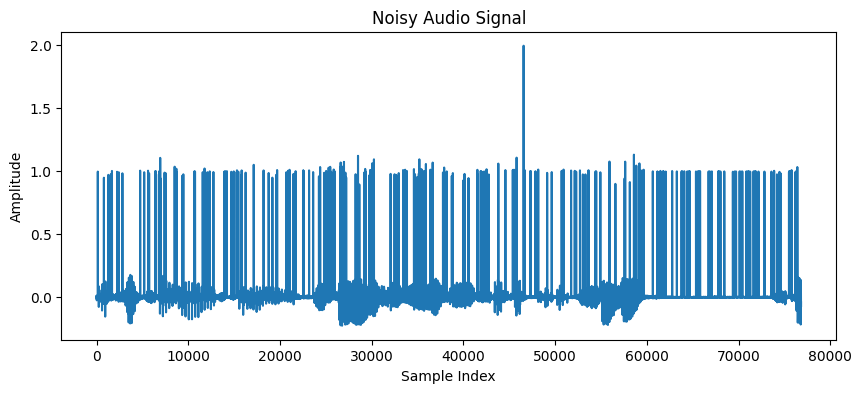

In [110]:

noisy_waveform = add_noise(waveform.numpy(), noise_type="poisson", snr_db=20)

# Play the noisy audio
display(Audio(noisy_waveform, rate=sample_rate))

# impulse noise
plot_waveform(noisy_waveform)



In [ ]:
from numpy import ndarray


def add_scaled_noise(signal: ndarray, intensity=0.5, noise_type="gaussian") -> ndarray:
    """
    Dodaje szum o określonej intensywności względem sygnału.

    :param signal: Sygnał wejściowy.
    :param intensity: Intensywność szumu względem RMS sygnału (np. 0.5 dla 50%).
    :param noise_type: Typ szumu ('gaussian', 'uniform').
    :return: Sygnał z dodanym szumem.
    """
    rms_signal = np.sqrt(np.mean(signal**2))
    rms_noise = intensity * rms_signal

    if noise_type == "gaussian":
        noise = np.random.normal(0, rms_noise, signal.shape)
    elif noise_type == "uniform":
        noise = np.random.uniform(-rms_noise, rms_noise, signal.shape)
    elif noise_type == "poisson":
        noise = np.random.poisson(rms_noise, signal.shape) - rms_noise
    else:
        raise ValueError("Nieobsługiwany typ szumu.")

    return signal + noise

0.03012958914041519


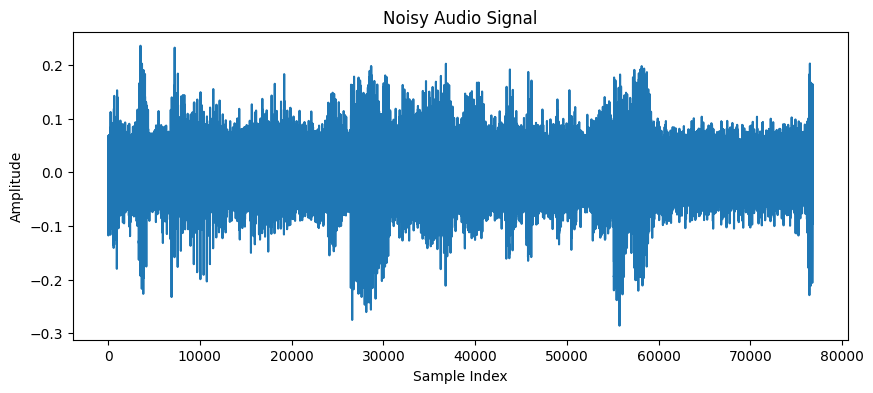

In [126]:

noisy_waveform = add_scaled_noise(waveform.numpy(), intensity=1, noise_type="gaussian")
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)


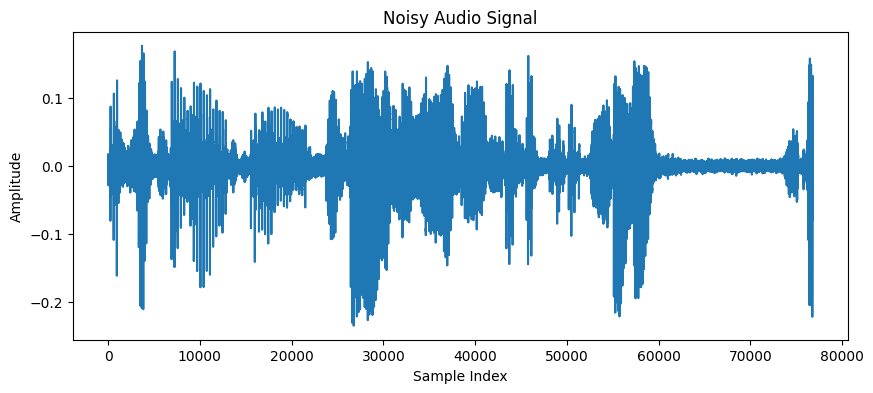

In [118]:
noisy_waveform = add_scaled_noise(waveform.numpy(), intensity=0.1, noise_type="gaussian")
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)

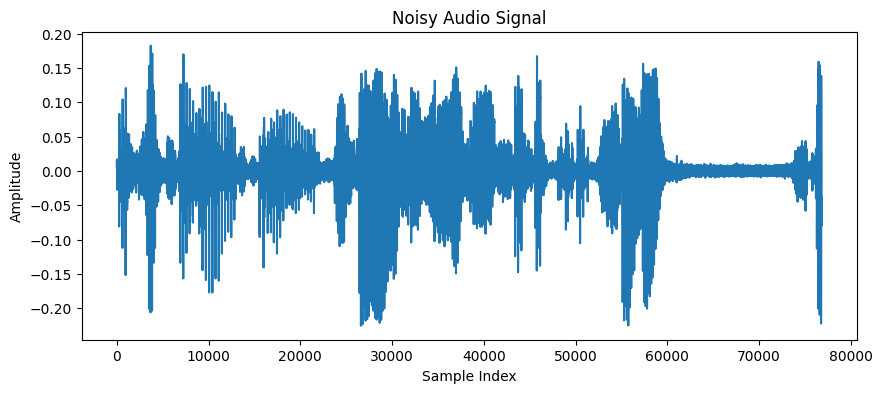

In [120]:
noisy_waveform = add_scaled_noise(waveform.numpy(), intensity=0.2, noise_type="uniform")
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)

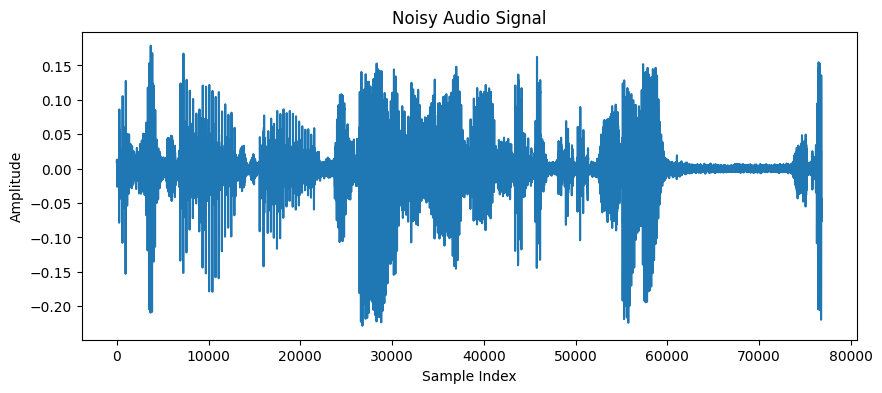

In [121]:
noisy_waveform = add_scaled_noise(waveform.numpy(), intensity=0.1, noise_type="uniform")
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)

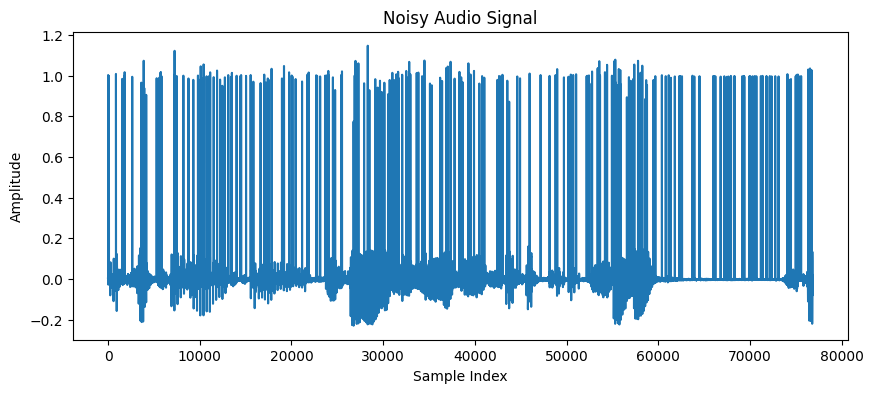

In [123]:
noisy_waveform = add_scaled_noise(waveform.numpy(), intensity=0.1, noise_type="poisson")
display(Audio(noisy_waveform, rate=sample_rate))
plot_waveform(noisy_waveform)

## Sinusoidal waveform

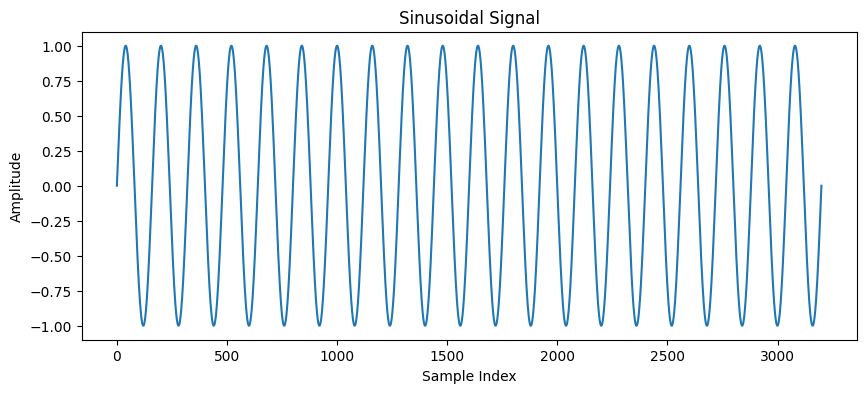

In [61]:
# make a sinusoidal signal
from sympy import plot


t = np.linspace(0, 1, 3200)  # Make the signal shorter to show only one loop
f = 20

signal = np.sin(2 * np.pi * f * t)

# play and show the signal
display(Audio(signal, rate=16000))

plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

In [87]:

noisy_signal = add_scaled_noise(signal, intensity=1, noise_type="gaussian")
display(Audio(noisy_signal, rate=16000))

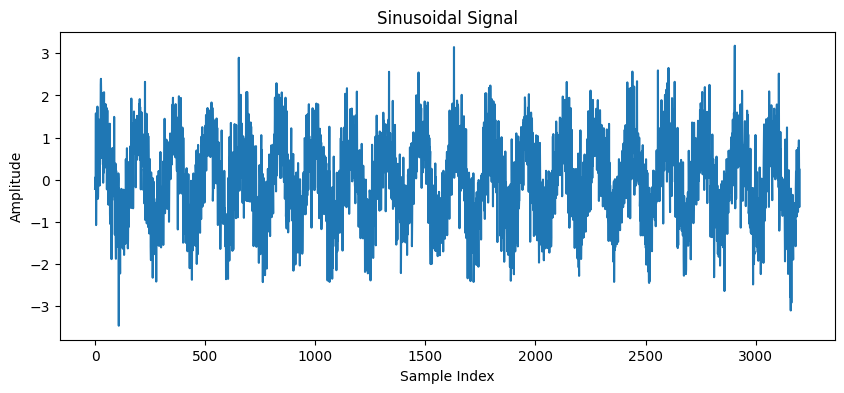

In [88]:
plt.figure(figsize=(10, 4))
plt.plot(noisy_signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

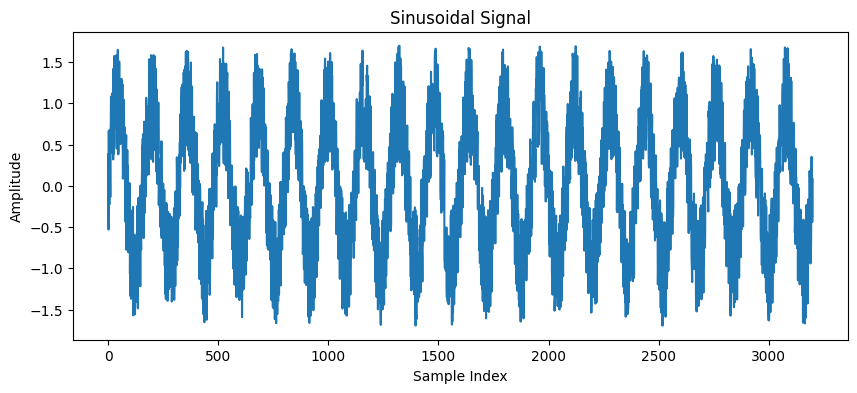

In [89]:
noisy_signal = add_scaled_noise(signal, intensity=1, noise_type="uniform")
display(Audio(noisy_signal, rate=16000))
plt.figure(figsize=(10, 4))
plt.plot(noisy_signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

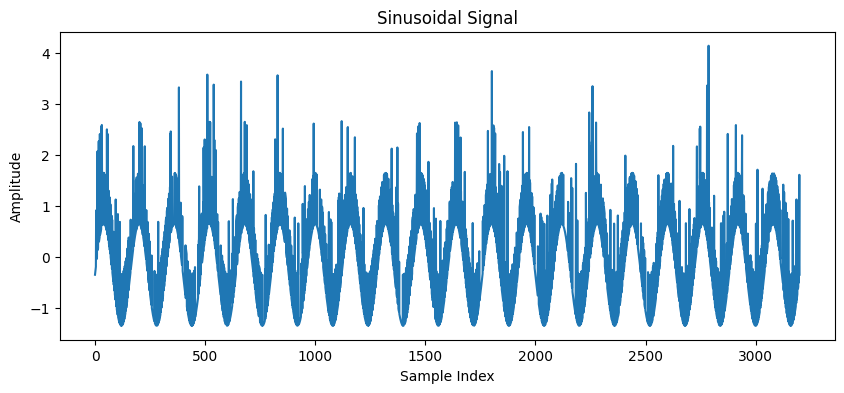

In [91]:
noisy_signal = add_scaled_noise(signal, intensity=0.5, noise_type="poisson")
display(Audio(noisy_signal, rate=16000))
plt.figure(figsize=(10, 4))
plt.plot(noisy_signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

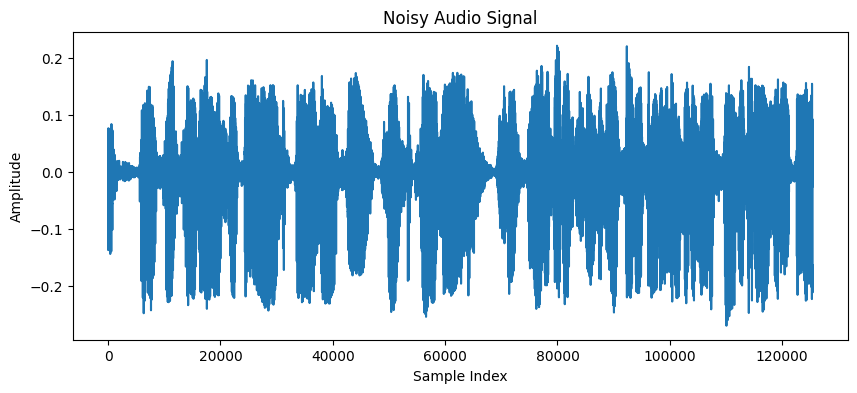

In [95]:
display(Audio(waveform, rate=16000))
plot_waveform(waveform.numpy())